In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
#
if not exists(".isparent"):
    %cd -q ../
! echo "current working dir:" $(pwd)

current working dir: /home/giulio/PhD/projects/ising-model


In [2]:
pthconfig = "res/config/.config_acf_compute"
df = pd.read_csv(pthconfig)
df

,tMC,N_M,_m_sav,Navg,L1,L2,Ls,b_m,b_M,b_s,_m_init,_m_upd,_m_mea
0,1,50000,0,50,10,10,20,0.01,0.5,0.02,cs_unif,algo_metro,1


In [7]:
L1, L2 = df['L1'][0], df['L2'][0];
N = L1 * L2
Nlst = []
while (N <= df['N_M'][0]):
    Nlst.append(N)
    L1 += df['Ls'][0]
    L2 += df['Ls'][0]
    N = L1 * L2;
betalst = np.arange(df['b_m'][0], df['b_M'][0], df['b_s'][0])

In [21]:
N = 900
tauint = []
for beta in betalst:
    pth = f"res/obs/N=900/bt=0.01/tauint_avg=50.bin"
    tauint.append(np.fromfile(pth, dtype=np.double))


array([86.50058016])

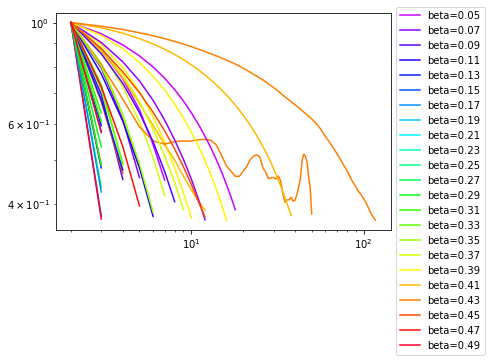

In [24]:
import matplotlib as mpl
color = plt.cm.rainbow(np.linspace(0, 1, len(Nlst)))
norm = mpl.colors.Normalize(vmin=min(betalst), vmax=max(betalst))
cmap = plt.cm.gist_rainbow_r
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
for N in Nlst[:2]:
    for beta in betalst[2:]:
        try:
            pth = f"res/obs/N={N:d}/bt={beta:.2g}/ACF_avg={df['Navg'][0]:d}.bin"
            acf = np.fromfile(pth, dtype=np.double)
            midx = np.argmax(acf<1/np.exp(1))
            x = np.linspace(1, midx, num=midx)
            plt.plot(x[1:], acf[1:midx], '-', color=m.to_rgba(beta), label=fr"beta={beta:.3g}")
        except:
            pass
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
  if label not in newLabels:
    newLabels.append(label)
    newHandles.append(handle)
plt.legend(newHandles, newLabels, bbox_to_anchor=(1.0, 1.05))
plt.yscale("log")
plt.xscale("log")
# plt.legend()
# plt.xlim(0, 100)

In [13]:
Nlst

[100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]